## Carregamento da imagem e pré-processamento

In [2]:
import cv2
import matplotlib.pyplot as plt

In [12]:
imagem = cv2.imread('../Images/people1.jpg')

#convertendo de BGR(OpenCV) para RGB(Matplotlib) para exibir no notebook e não em outra janela, sem fins de processamento
imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)


In [13]:
imagem.shape

#(altura, largura, número de canais - 3 (RGB))
#essa imagem está com um tamanho bom, caso esteja muito grande, recomenda-se diminuir para melhorar o processamento
#para diminuir utilize: cv2.resize(imagem, (altura, largura))


(408, 612, 3)

In [14]:
#o número de pixels da imagem é o produto entre altura*largura*número_de_canais
print(f'Número de pixels da imagem: {408*612*3}')

Número de pixels da imagem: 749088


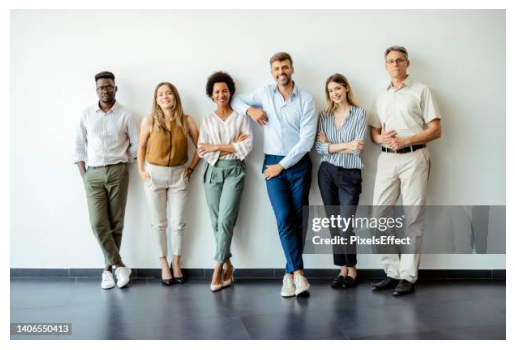

In [15]:
plt.axis('off')
plt.imshow(imagem_rgb)
plt.show()


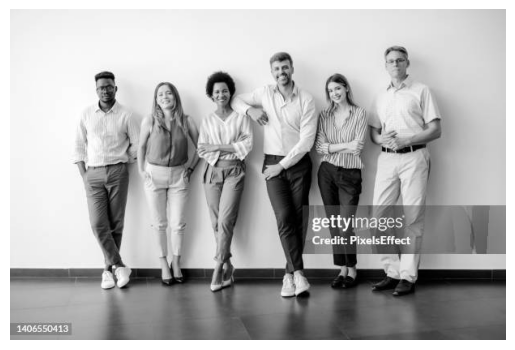

In [16]:
#processamento
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

#apenas para exibir no notebook
imagem_cinza_plot = cv2.cvtColor(imagem_cinza, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(imagem_cinza_plot)
plt.show()

In [17]:
imagem_cinza.shape

#não há mais a informação do canal, apenas 1 valor


(408, 612)

In [18]:
print(f'Número de pixels da imagem em tons de cinza: {408*612}')

Número de pixels da imagem em tons de cinza: 249696


## Detecção de faces

In [21]:
#associa o objeto criado (detector_facial) com o arquivo XML para detecção de faces
#esse arquivo pode ser obtido em: https://github.com/kipr/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml

detector_facial = cv2.CascadeClassifier('../Cascades/haarcascade_frontalface_default.xml')

In [22]:

#obtém faces na imagem convertida em tons de cinza através do método detectMultiScale da classe CascadeClassifier
deteccoes = detector_facial.detectMultiScale(imagem_cinza)

In [23]:
#cada linha representa uma face detectada na imagem, nesse caso 5 faces foram detectadas
#os dois primeiros valores de uma linha, por exemplo, 389 e 89, indicam as posições X e Y onde a face inicia
#o terceiro e o quarto valor da linha indicam o tamanho da face, por exemplo, 26, 26, quer dizer que a face possui 26 pixels de largura e 26 pixels de altura
deteccoes

array([[389,  89,  26,  26],
       [247,  91,  28,  28],
       [178,  94,  27,  27],
       [322,  63,  27,  27],
       [461,  53,  30,  30]])

In [24]:
#obtém o número de linhas
len(deteccoes)

5

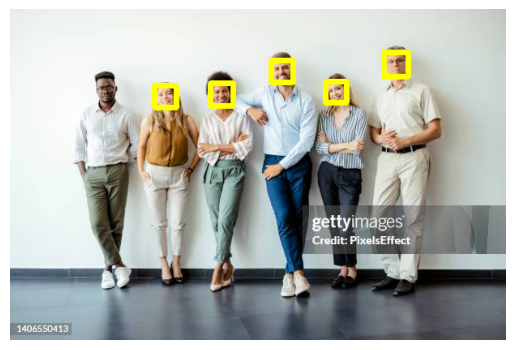

In [50]:
#recarrega a imagem original
imagem = cv2.imread('../Images/people1.jpg')

#obtém para cada uma das variáveis os valores (posição x, posição y, largura, altura)
for x, y, w, h in deteccoes:
    #print(x, y, w, h)

    #desenha um retângulo nos pontos identificados na imagem colorida
    cv2.rectangle(imagem, (x, y), (x+w, y+h), (0, 255, 255), 5)

#convertendo de BGR(OpenCV) para RGB(Matplotlib) para exibir no notebook e não em outra janela, sem fins de processamento
imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
plt.imshow(imagem_rgb)
plt.axis('off')
plt.show()

